# Install and Import Modules

In [1]:
# Installing the required modules
!pip install opencv-python easyocr -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 6.7 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/Frenz86/EasyOCR_Project.git

Cloning into 'EasyOCR_Project'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 30 (delta 9), reused 17 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 429.60 KiB | 4.83 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [5]:
cd EasyOCR_Project

[Errno 2] No such file or directory: 'EasyOCR_Project'
/content/EasyOCR_Project


In [ ]:
# Installing the CPU and CUDA
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [4]:
# Importing the different libraries
import cv2
import easyocr
import matplotlib.pyplot as plt
import os

# Defining the path of images

In [6]:
# Optional by defining the path of each images
img0_path = './images/text0.jpg'
img1_path = './images/text1.jpg'
img2_path = './images/text2.jpg'
img3_path = './images/text3.jpg'
img4_path = './images/text4.jpg'
img5_path = './images/text5.jpg'
img6_path = './images/text6.jpg'
img7_path = './images/text7.jpg'
img8_path = './images/text8.jpg'
img9_path = './images/text9.jpg'

In [7]:
# Extracting the path of images one by one in the form of list
img_path = "./images/"
create_path = lambda f : os.path.join(img_path, f)
test_image_files = os.listdir(img_path)

for f in test_image_files:
    print(f)

text4.jpg
text2.jpg
text1.jpg
text3.jpg
text0.jpg


In [8]:
# loading the path of image by passing the position of the image
img = test_image_files[3]
path = create_path(img)

# Recognizing the text from images

In [9]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''

    reader = easyocr.Reader(['en'])        # For English - 'en'
    return reader.readtext(img_path)

In [10]:
result = recognize_text(path)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [11]:
result

[([[np.int32(261), np.int32(25)],
   [np.int32(779), np.int32(25)],
   [np.int32(779), np.int32(69)],
   [np.int32(261), np.int32(69)]],
  'SHADOWING PRACTICE 08',
  np.float64(0.8204863226821353)),
 ([[np.int32(47), np.int32(94)],
   [np.int32(925), np.int32(94)],
   [np.int32(925), np.int32(136)],
   [np.int32(47), np.int32(136)]],
  'The city has contracted with Acme Construction to improve certain',
  np.float64(0.8195729923979458)),
 ([[np.int32(43), np.int32(139)],
   [np.int32(419), np.int32(139)],
   [np.int32(419), np.int32(177)],
   [np.int32(43), np.int32(177)]],
  'roads in your neighborhood:',
  np.float64(0.9687804836189268)),
 ([[np.int32(433), np.int32(139)],
   [np.int32(925), np.int32(139)],
   [np.int32(925), np.int32(175)],
   [np.int32(433), np.int32(175)]],
  'Work will commence on June 3rd, as',
  np.float64(0.7707112402022895)),
 ([[np.int32(45), np.int32(180)],
   [np.int32(951), np.int32(180)],
   [np.int32(951), np.int32(224)],
   [np.int32(45), np.int32(224)

# Loading the image

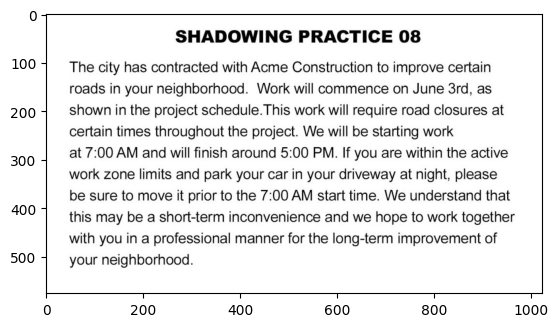

In [12]:
# Showing the current(Selected) image
img_1 = cv2.imread(path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Process of Extraction

In [13]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''

    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # Recognise text
    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)

            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./Output/{save_name}_overlay.jpg', bbox_inches='tight')

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Detected text: SHADOWING PRACTICE 08 (Probability: 0.82)
Detected text: The city has contracted with Acme Construction to improve certain (Probability: 0.82)
Detected text: roads in your neighborhood: (Probability: 0.97)
Detected text: Work will commence on June 3rd, as (Probability: 0.77)
Detected text: shown in the project schedule.This work will require road closures at (Probability: 0.80)
Detected text: certain times throughout the project: (Probability: 0.65)
Detected text: We will be starting work (Probability: 0.98)
Detected text: at 7:00 AM and will finish around 5.00 PM: If you are within the active (Probability: 0.68)
Detected text: work zone limits and park your car in your driveway at night, please (Probability: 0.57)
Detected text: be sure to move it prior to the 7:00 AM start time We understand that (Probability: 0.75)
Detected text: this may be a short-term inconvenience and we hope to work together (Probability: 0.86)
Detected text: with you in a (Probability: 0.75)
Det

<Figure size 640x480 with 0 Axes>

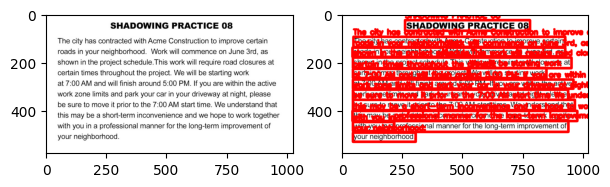

In [14]:
overlay_ocr_text(path, 'Text3_Output')

# Final Output(text)

In [15]:
# Extracting text from the image
def ocr_text(img_path):

    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')


In [16]:
# Extracted Text
ocr_text(path)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


SHADOWING PRACTICE 08
The city has contracted with Acme Construction to improve certain
roads in your neighborhood:
Work will commence on June 3rd, as
shown in the project schedule.This work will require road closures at
certain times throughout the project:
We will be starting work
at 7:00 AM and will finish around 5.00 PM: If you are within the active
work zone limits and park your car in your driveway at night, please
be sure to move it prior to the 7:00 AM start time We understand that
this may be a short-term inconvenience and we hope to work together
with you in a
professional manner for the long-term improvement of
your neighborhood:
